In [1]:
import gpxpy
import glob
import pandas as pd

In [2]:
files = glob.glob('.\\activities\\running\\*.gpx')


dates     = []
distances = []

for file in files:

    with open(file, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
    
    try:
        dates.append( gpx.get_time_bounds()[0].date() )
        distances.append( gpx.get_points_data()[-1][1] )
    except:
        pass

<Axes: title={'center': 'Weekly Running Distance'}, xlabel='date', ylabel='Distance (km)'>

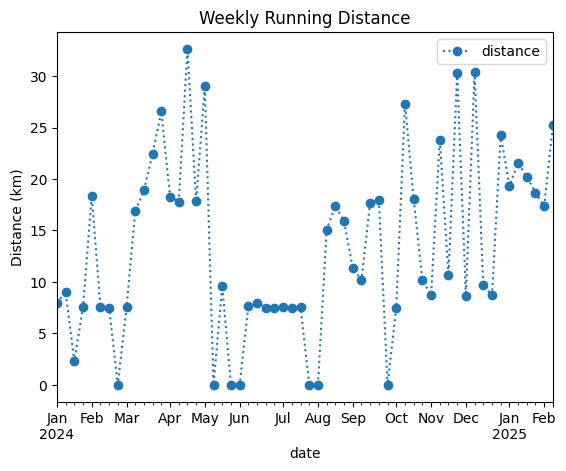

In [25]:
df = pd.DataFrame({'date': dates, 'distance': distances})

df['distance'] = df['distance'] / 1000

df['date'] = pd.to_datetime(df['date'])
df = df.resample('W', on='date').sum().reset_index()
# .rolling(7).sum()

df.plot(x='date', y='distance', style = 'o:', ylabel='Distance (km)', title='Weekly Running Distance')